In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

%matplotlib inline

In [2]:
df = pd.read_csv("data/05-insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Calculate descriptive statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Linear Regression

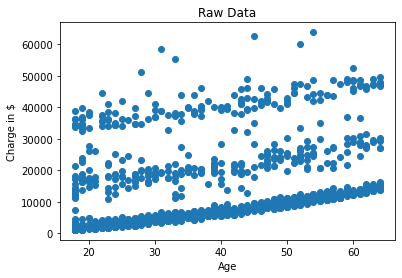

In [4]:
# Visualize (possible) dependency charges = f(age)

x_values = df["age"].values
y_values = df["charges"].values
plt.scatter(x_values, y_values)
plt.xlabel('Age')
plt.ylabel('Charge in $')
plt.title('Raw Data')
plt.show()

The data looks linear on two different levels. The first is linear relationship "charges = f(age) under ten thousand dollars". Lets analyze this group only

In [5]:
below_10000 = df[df["charges"] <= 10000]
x_values = below_10000["age"].values
y_values = below_10000["charges"].values

In [6]:
# Splitting into training and testing sets

#LinearRegression expect 2D array, so we need reshape 1D x_values into 2D x_array
x_array = x_values.reshape(-1,1) 

x_train, x_test, y_train, y_test = train_test_split(x_array, y_values, 
                                                    train_size=.8, # 80% of initial dataset composes the training set
                                                    test_size=.2)  # 20% of initial dataset composes the testing set
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

x_train shape (569, 1)
y_train shape (569,)
x_test shape (143, 1)
y_test shape (143,)


In [7]:
# Linear regression
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) # b1

lr.intercept_: -2636.2771345364217
lr.coef_: [236.44063623]


In [8]:
# Evaluation with R2*100%

print(f"Train Score: {regr.score(x_train,y_train)*100}%")
print(f"Test Score: {regr.score(x_test,y_test)*100}%")

Train Score: 91.98047413908823%
Test Score: 90.02676806002444%


Conclusion. Charges increase by $236 each year. The model is good (R2 is about 0.9)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

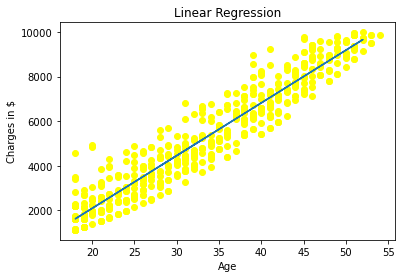

In [9]:
# Visualize dependency "charges = f(age) under ten thousand dollars"

plt.scatter(x_train, y_train, color="yellow")

y_prediction = regr.predict(x_test)
plt.plot(x_test, y_prediction)

plt.xlabel("Age")
plt.ylabel("Charges in $")
plt.title("Linear Regression")
plt.plot

## Classifier of charges

In [10]:
# Data preparation

x_class = df[['age', 'bmi']]
y_class = [(chg <= 10000) for chg in df["charges"]]

x_train, x_test, y_train, y_test = train_test_split(x_class, y_class, 
                                                    train_size=.8, test_size=.2)  

In [11]:
# Create an instance of the model and find fitting to data
regr = linear_model.LogisticRegression()
regr.fit(x_train, y_train) 

LogisticRegression()

In [12]:
predictions = regr.predict(x_test)
print(classification_report(y_test, predictions, 
                            target_names = ["Under $10 000","Over $10 000"]))

               precision    recall  f1-score   support

Under $10 000       0.69      0.67      0.68       118
 Over $10 000       0.75      0.77      0.76       150

     accuracy                           0.72       268
    macro avg       0.72      0.72      0.72       268
 weighted avg       0.72      0.72      0.72       268



## Impact of smoking

In [13]:
df = pd.read_csv("data/05-insurance_ohe.csv")
df.head()

,age,sex,bmi,children,region,charges,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,0,1
1,18,male,33.770,1,southeast,1725.55230,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0
4,32,male,28.880,0,northwest,3866.85520,1,0


In [14]:
# Data preparation

x_class = df[['age', 'bmi', 'smoker_yes']]
y_class = df[['charges']]

x_train, x_test, y_train, y_test = train_test_split(x_class, y_class, 
                                                    train_size=.8, test_size=.2)  

In [15]:
# Linear regression with dummy variables
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) # b1 for 'age', b2 for 'bmi', b3 for 'smoker'

lr.intercept_: [-11580.70772937]
lr.coef_: [[  269.21812733   308.84168489 24209.7753447 ]]


Model for non-smokers is<br>
<i>charges = -11580.7 + 269.2 * age + 308.8 * bmi</i>

Model for smokers is<br>
<i>charges = 12629.1 + 269.2 * age + 308.8 * bmi</i>